#Copyright <2021> <Gunther Witzel>
#
#Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:
#
#1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.
#
#2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.
#
#3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.
#
#THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

In [1]:
import ssc_model as model

In [2]:
help(model)

Help on module ssc_model:

NAME
    ssc_model

DESCRIPTION
    This module contains eight classes (constants, SingleZoneSgrA, ElectronPlasma, SyncSED,
    GaussianProcess, LightCurves, SEDMovie, ParticleSystem) to generate synchrotron and
    synchrotron self-Compton spectra, as well as model their temporal evolution. It can generate time
    series at various wavelengths, visualize the temporal spectral evolution of the source in form of an
    animation, and provides an interface to load the posterior of an approximate Bayesian computation.
    Examples on how to generate an animation with this code is provided in the Jupyter notebook
    "Animation Demo.ipynb". The model and the Bayesian analysis is described in detail in the
     ApJS article "Rapid Variability of Sgr A* across the Electromagnetic Spectrum", Witzel et al. 2021.

CLASSES
    builtins.object
        ElectronPlasma
        GaussianProcess
        LightCurves
        ParticleSystem
        SEDMovie
        SingleZoneSg

In [3]:
VarDict = {"PSD_slope_fast": "fast_a1","PSD_break_fast": "fast_b1",\
                "mu_fast": "fast_mu","sig_fast": "fast_sig","PSD_slope_slow": "a1","PSD_break_slow": "b1",\
                "mu_slow": "mu","sig_slow": "sig", "B_0": "B_0", "gamma": "gamma", "ampfac": "ampfac", \
                 "size_0": "size_0", "noise_NIR": "vlt_noise", \
            "X_offset": "I_offset", "rate_conv": "rate_conv", \
           "eff_area": "I_eff_area", "model_gain": "a", "f0_B": "f_0_B", "f0_theta": "f_0_size",\
           "noise_345GHz" : "APEX_noise", "noise_230GHz" : "SMA_noise"}

In [4]:
run = model.ParticleSystem("run.particle", delPoints = 1418) # Creates a particle system in file run.particle and deletes the 1418 points with highest weights

deleting 1418 data points with the following weights: 
[5.12923762e-02 4.04179702e-02 3.07697645e-02 ... 4.15749991e-05
 4.15718171e-05 4.15578674e-05]


In [5]:
run.ParamSet(VarDict, PickParticle = True, i = 1665) # sets parameters of this particle system with given variable dictionary
run.params_model.update({"noise_22GHz": 0.02}) # adds parameter noise_22GHz
run.params_model

particle used:  1665
PSD_slope_fast  [fast_a1]:   1.899349706
PSD_break_fast  [fast_b1]:   0.01242930958
mu_fast  [fast_mu]:   -2.650290318
sig_fast  [fast_sig]:   1.295638108
PSD_slope_slow  [a1]:   4.429918174
PSD_break_slow  [b1]:   0.009086700451
mu_slow  [mu]:   -5.290879936
sig_slow  [sig]:   0.5295815771
B_0  [B_0]:   7.576788458
gamma  [gamma]:   2.726343527
ampfac  [ampfac]:   1.0
size_0  [size_0]:   3.041162688
noise_NIR  [vlt_noise]:   0.4338829494
X_offset  [I_offset]:   0.0008648846269
rate_conv  [rate_conv]:   170780.7746
eff_area  [I_eff_area]:   1.0
model_gain  [a]:   0.5
f0_B  [f_0_B]:   0.0003805390813
f0_theta  [f_0_size]:   0.0003805390813
noise_345GHz  [APEX_noise]:   0.1023917773
noise_230GHz  [SMA_noise]:   0.07894856806


{'PSD_slope_fast': 1.899349706,
 'PSD_break_fast': 0.01242930958,
 'mu_fast': -2.650290318,
 'sig_fast': 1.295638108,
 'PSD_slope_slow': 4.429918174,
 'PSD_break_slow': 0.009086700451,
 'mu_slow': -5.290879936,
 'sig_slow': 0.5295815771,
 'B_0': 7.576788458,
 'gamma': 2.726343527,
 'ampfac': 1.0,
 'size_0': 3.041162688,
 'noise_NIR': 0.4338829494,
 'X_offset': 0.0008648846269,
 'rate_conv': 170780.7746,
 'eff_area': 1.0,
 'model_gain': 0.5,
 'f0_B': 0.0003805390813,
 'f0_theta': 0.0003805390813,
 'noise_345GHz': 0.1023917773,
 'noise_230GHz': 0.07894856806,
 'noise_22GHz': 0.02}

In [6]:
#mov = model.SEDMovie(run.params_model, 10500.0)
mov = model.SEDMovie(run.params_model, 5000.0) # creates object of class for generating movies of SEDs and light curves. Gives the parameter dictionary above and 5000 minutes for length of time series
mov.ModelSetup() # sets up input dictionaries. See lines #2413

RandomGen: taking provided random numbers
RandomGen: taking provided random numbers


In [7]:
mov.MovieData()

In [8]:
mov.MovieMake("SED_movie_new.mp4", 0.0, 200.0, 100)
#mov.MovieMake("SED_movie_demo.mp4", 0.0, 10000.0, 100)

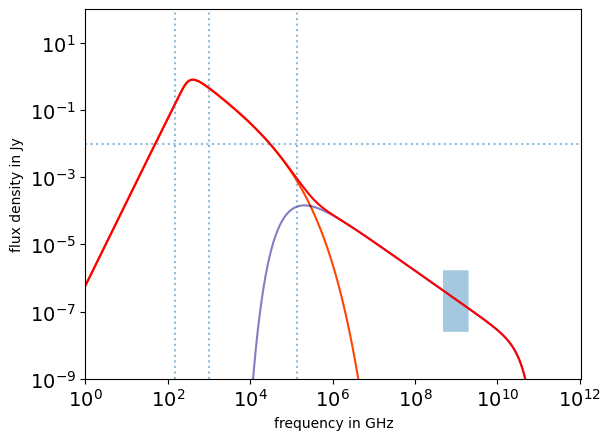

In [9]:
rr, yy, yyy, yyyy = mov.SySED.SyncSED_FL(0.0, 12.0, 0.008
                                         , mov.const.freq_2_2_um, 25000.,\
                     0.01, 0.01*9.0**(1./4.), 500)

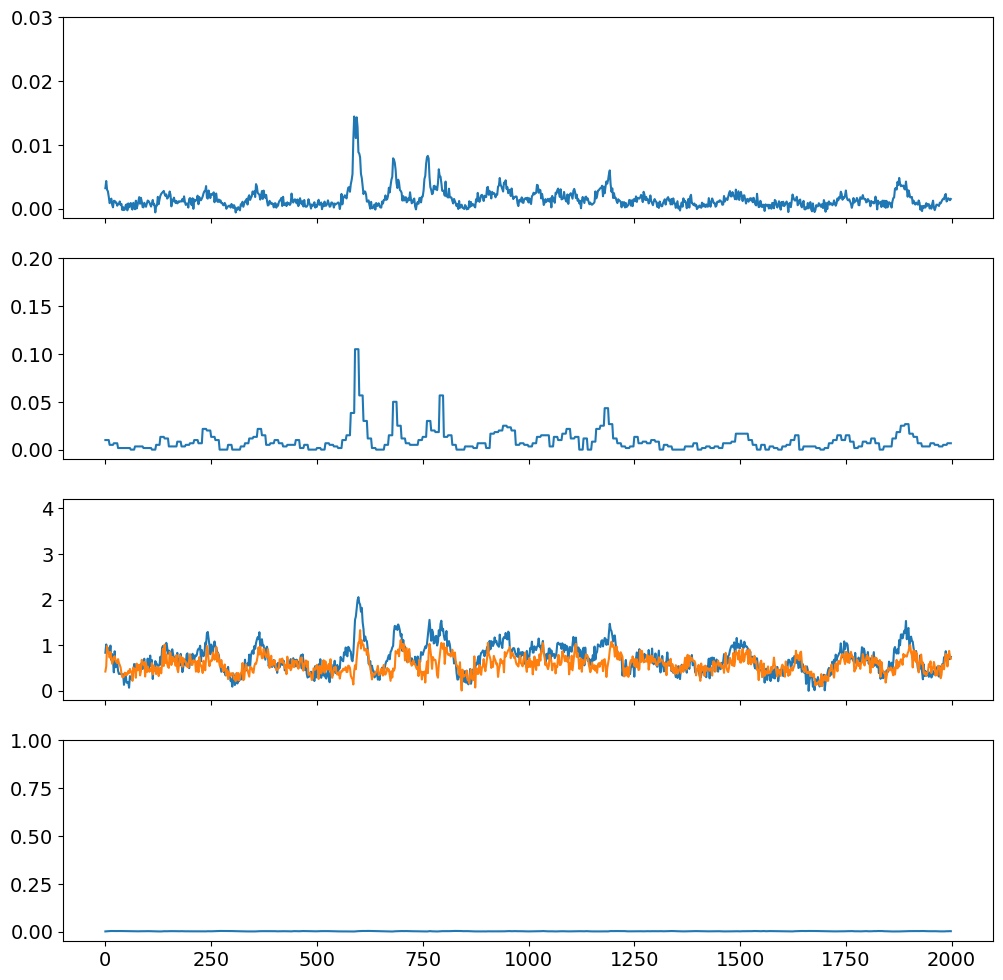

In [10]:
mov.PlotData(0.0, 1000.0, name = "demo", scale1 = 0.03, \
             scale2 = 0.2, scale3 = 4.2, scale4 = 1.0, mode = 'noise', submm = 'both') # First ax is f_future? Whatever that is. Second is same as first but rebinned. third ax is either 345 GHz (blue) or 230 GHz (orange)

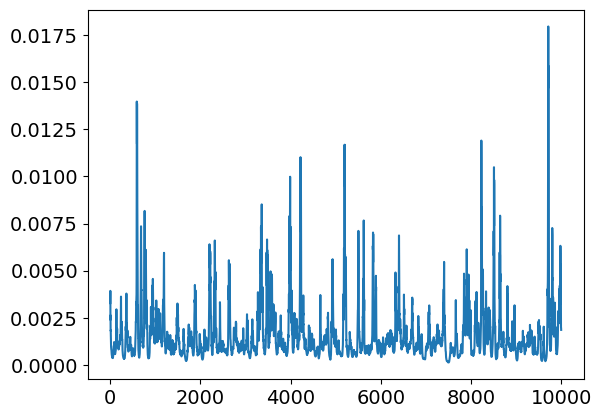

In [11]:
import matplotlib.pyplot as plt

plt.plot(mov.get_lc()[0],mov.get_lc()[1])